In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from datetime import date, timedelta

import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")
df = pd.read_excel("Test Dataset.xlsx", header = 1, usecols = [0,1,2,3,4,5])
df["Capacity"].fillna(25, inplace = True)

os.chdir("/Volumes/data1/488 Sacred Heart/601-1 SiboniBldg/03-Data/Raw Sensor Data")
test1 = pd.read_excel("Room 5B09.xlsx", header = 1, usecols = [0,1,2,3,4])
test2 = pd.read_excel("Room 5114.xlsx", header = 1, usecols = [0,1,2,3,4])
test3 = pd.read_excel("Room 5305.xlsx", header = 1, usecols = [0,1,2,3,4])

### Schedule Heat Map

In [3]:
# Function to create binary heat map of classroom utilization
def scheduleMapping(df):    
    time = []
    for hour, minute in zip(df["Hour"], df["Minute"]):
        time.append(datetime.time(hour, minute))

    df["Time"] = time

    n = 0
    for day in df["Day of Week"].unique().tolist():
        if n == 0:
            holder = df[df["Day of Week"] == day][["Time", "Occupied"]].set_index(["Time"])
            holder.columns = [str(day)]
            n+=1
        else:
            addition = df[df["Day of Week"] == day][["Time", "Occupied"]].set_index(["Time"])
            addition.columns = [str(day)]
            holder = pd.concat([holder, addition], axis = 1)



    scheduleFigure = plt.figure(figsize = (18,10))
    axes = scheduleFigure.add_axes([0,0,1,1])
    sns.heatmap(holder.T, cmap = "GnBu", cbar = False, linewidths = 0.01)
    axes.set_title("Schedule Map", fontsize = 20)
    axes.set_xlabel("Time of Day")


    xlabels = []
    for x in holder.reset_index()["Time"]:
        if x.minute != 0:
            xlabels.append(" ")
        else:
            xlabels.append(x.hour)

    axes.set_xticklabels(xlabels,rotation = "horizontal")


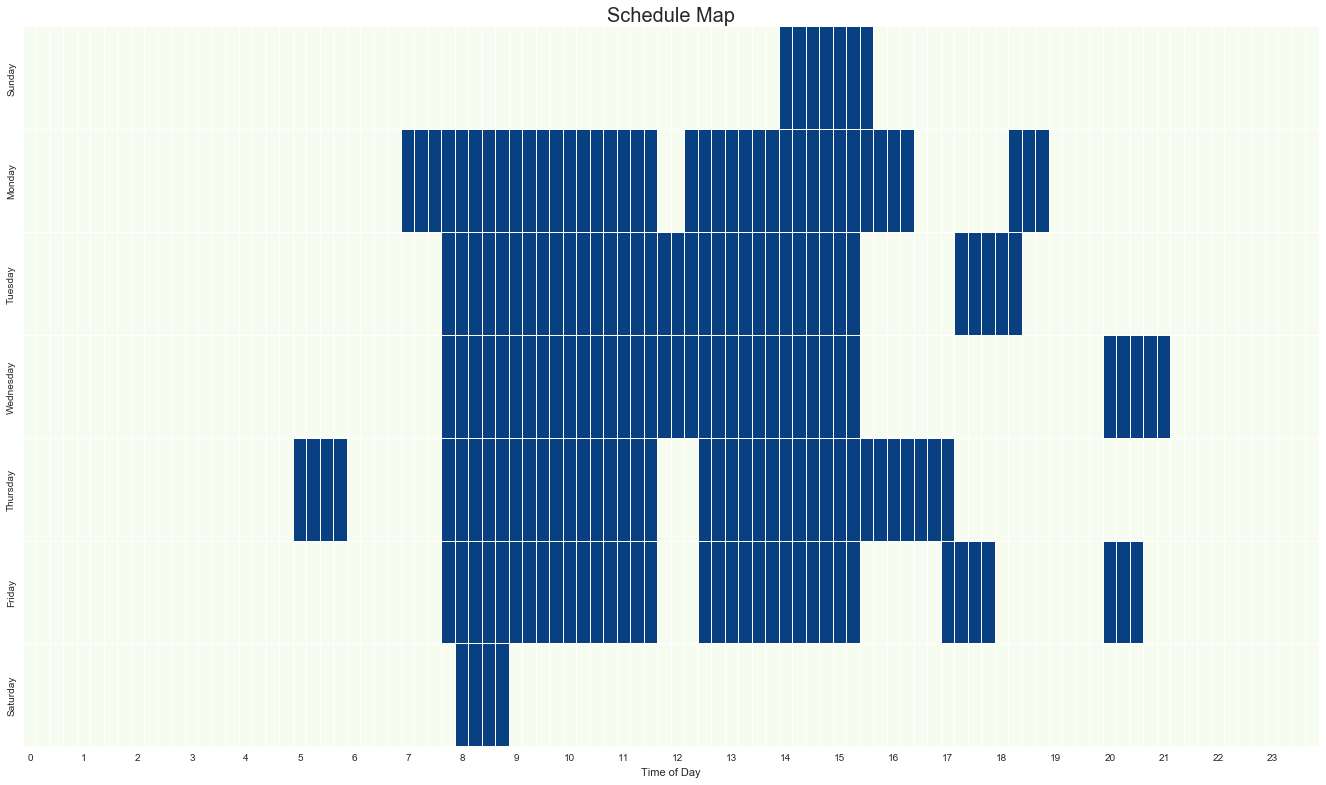

In [4]:
scheduleMapping(df)

### Average Daily Occupancy by Hour Plot

In [5]:
# Function to create occupancy % by day of the week and by hour
def occupancyPlot(df):
    occupancyFigure = plt.figure(figsize = (18,10))
    axes = occupancyFigure.add_axes([0,0,1,1])
   
    n = 0
    for day in df["Day of Week"].unique().tolist():
        if n == 0:
            holder = pd.DataFrame(df[df["Day of Week"] == day].groupby("Hour")["Occupied"].sum()/df[df["Day of Week"] == day].groupby("Hour")["Occupied"].count())
            holder.columns = [str(day)]
            axes.plot(holder[[str(day)]], label = str(day), marker = "o", markersize = 6, linewidth = 3)
            n+=1
        else:
            addition = pd.DataFrame(df[df["Day of Week"] == day].groupby("Hour")["Occupied"].sum()/df[df["Day of Week"] == day].groupby("Hour")["Occupied"].count())
            addition.columns = [str(day)]
            holder = pd.concat([holder, addition], axis = 1)
            axes.plot(holder[[str(day)]], label = str(day), marker = "o", markersize = 6, linewidth = 3)
    
    axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    axes.set_title("Occupancy Plot", fontsize = 20)
    axes.set_xlabel("Time of Day")
    axes.set_ylabel("Average Occupancy %")
    axes.set_ylim([0,1.2])
    axes.set_xlim([0,23])
    plt.xticks(np.arange(0, 24, 1.0))     

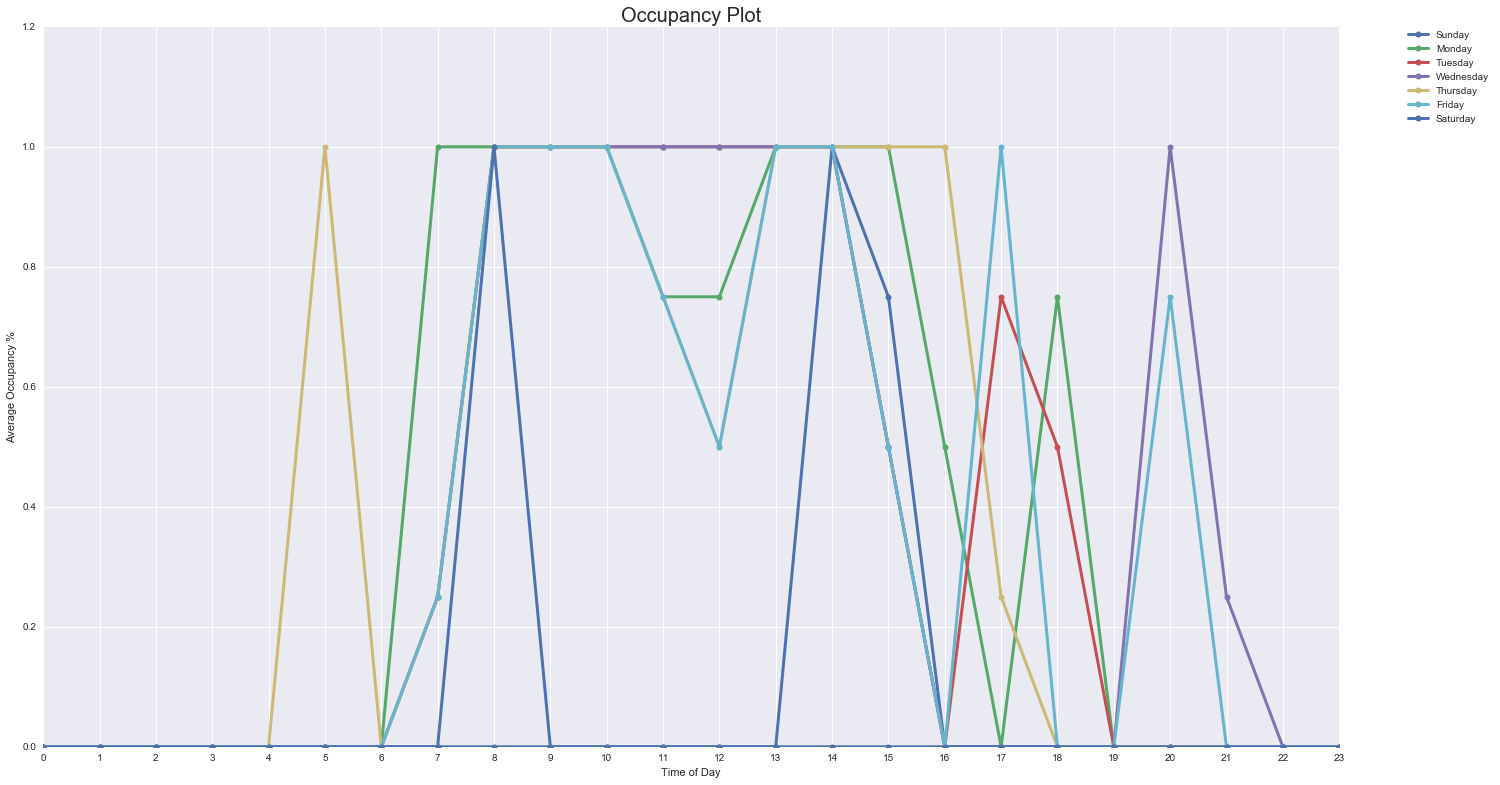

In [6]:
occupancyPlot(df)

In [9]:
# def detailedOccupancy(df):
#     occupancyFigure = plt.figure(figsize = (18,10))
#     axes = occupancyFigure.add_axes([0,0,1,1])

#     time = []
#     for hour, minute in zip(df["Hour"], df["Minute"]):
#         time.append(datetime.time(hour,minute))

#     df["Time"] = time

#     for x in df["Day of Week"].unique().tolist():
#         axes.plot(pd.DataFrame(df[df["Day of Week"] == x].groupby("Time")["Occupied"].sum()/
#                      df[df["Day of Week"] == x].groupby("Time")["Occupied"].count()), label = str(x), marker = "o", markersize = 6, linewidth = 3)

#     axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#     axes.set_title("Occupancy Plot", fontsize = 20)
#     axes.set_xlabel("Time of Day")
#     axes.set_ylabel("Average Occupancy %")
#     axes.set_ylim([0,1.2])

### Average Daily Utilization by Hour Plot

In [10]:
# Function to create utilization % by day of the week and by hour

def utilizationPlot(df):
    utilizationFigure = plt.figure(figsize = (18,10))
    axes = utilizationFigure.add_axes([0,0,1,1])

    n = 0
    for day in df["Day of Week"].unique().tolist():
        if n == 0:
            holder = pd.DataFrame(df[df["Day of Week"] == day].groupby("Hour")["Attendance"].mean()/df[df["Day of Week"] == day].groupby("Hour")["Capacity"].mean())
            holder.columns = [str(day)]
            axes.plot(holder[[str(day)]], label = str(day), marker = "o", markersize = 6, linewidth = 3)
            n+=1

        else:
            addition = pd.DataFrame(df[df["Day of Week"] == day].groupby("Hour")["Attendance"].mean()/df[df["Day of Week"] == day].groupby("Hour")["Capacity"].mean())
            addition.columns = [str(day)]
            holder = pd.concat([holder, addition], axis = 1)
            axes.plot(holder[[str(day)]], label = str(day), marker = "o", markersize = 6, linewidth = 3)

    axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    axes.set_title("Utilization Plot", fontsize = 20)
    axes.set_xlabel("Time of Day")
    axes.set_ylabel("Average Utilization %")
    axes.set_ylim([0,1.2])
    axes.set_xlim([0,23])
    plt.xticks(np.arange(0, 24, 1.0))

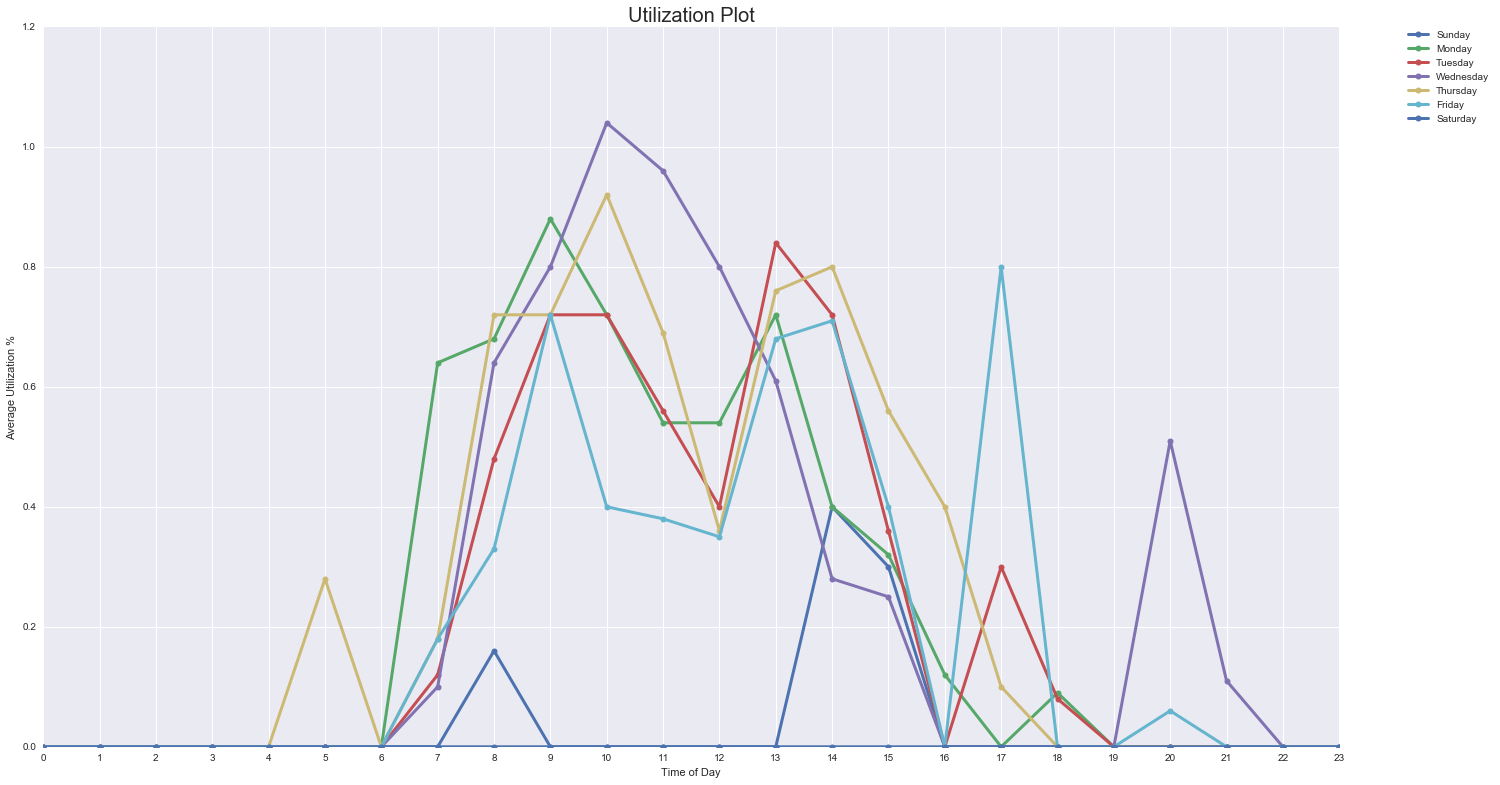

In [11]:
utilizationPlot(df)

### More Complex Data Set

#### Detailed Test Dataset is subset of data from "/Volumes/data1/670 UH/Facilities Utilization -Manoa/03_Working/Transfer_from_Sean_OLD/Manoa_UO_1.xlsx"

In [12]:
os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")
df2 = pd.read_excel("Detailed Test Dataset.xlsx")

In [15]:
def visualization(df, location = "BILGER HALL"):
    holder = df[df["Building Description"] == location].copy()
    try:
    
        # Update the day of the week column
        dow = {
            "F": "Friday",
            "M": "Monday",
            "T": "Tuesday",
            "W": "Wednesday",
            "R": "Thursday",
            "S": "Saturday"}

        holder["Day of Week"] = holder["Day of Week"].apply(lambda x: dow[x])
    
    except:
        pass
    
    # Create Enrollment Hours Column 
    enrollHours = []
    for enroll, hour in zip(holder["Class Enrollment"], holder["Class Hours Percentage"]):
        if (pd.isnull(enroll)) or (pd.isnull(hour)):
            enrollHours.append(np.nan)
        else:
            enrollHours.append(enroll * hour)
    
    holder["Enrollment Hours"] = enrollHours
    
    # Plot Occupancy by Day and Hour
    plt.style.use("seaborn-whitegrid")
    occupancyFigure = plt.figure(figsize = (18,10))
    occupancyAxes = occupancyFigure.add_axes([0,0,1,1])
    occupancyAxes.set_title("Average Occupancy Rate by Date", fontsize = 20)
    occupancyAxes.set_xlabel("Time of Day")
    occupancyAxes.set_ylabel("Average Occupancy %")
    occupancyAxes.set_ylim([0,1.2])
    occupancyAxes.set_xlim([0,23])
    plt.xticks(np.arange(0, 24, 1.0))     
    
    colors = ["#e74c3c", "#34495e", "#2ecc71", "#9b59b6", "#3498db", "#95a5a6"]

    occAvg = []
    n = 0
    for day in holder["Day of Week"].unique().tolist():
        dailyOccupancy = holder[holder["Day of Week"] == day].groupby("Hour")["Class Hours Percentage"].mean()
        dailyOccupancy = pd.DataFrame(data = dailyOccupancy, index = np.arange(0,24).tolist()).fillna(0)
        occupancyAxes.plot(dailyOccupancy, label = str(day), marker = "o", markersize = 6, linewidth = 3, color = colors[n])
        # Average Occupancy Rate between 8AM and 8PM
        occAvg.append(dailyOccupancy.ix[8:20].mean())
        n+=1
        
    
    occupancyAxes.axhline(np.mean(occAvg), color='black', linewidth=2)
    occupancyAxes.legend()
    
    # Plot Occupancy Box Plots
    sns.set_style("whitegrid")
    
    grey = ["#64686d", "#64686d", "#64686d", "#64686d", "#64686d", "#64686d"]
    sns.set_palette(grey)
    
    occBoxFig = plt.figure(figsize = (18,10))
    occBoxAxes = occBoxFig.add_axes([0,0,1,1])
    occBoxAxes.set_ylim([0,1.2])
    
    # Just Occupancy Rate between 8AM and 8PM
    sns.boxplot(data = holder[(holder["Hour"] >= 8) & 
                              (holder["Hour"] <= 20)][["Class Hours Percentage", "Day of Week", "Hour"]].dropna(), 
                y = "Class Hours Percentage",
                x = "Day of Week",
                width = .5
               )
    occBoxAxes.set_title("Average Occupancy Rate by Day")
    occBoxAxes.set_ylabel("Average Occupancy %")
    
    # Plot Utilization by Day and Hour
    plt.style.use("seaborn-whitegrid")
    utilizationFigure = plt.figure(figsize = (18,10))
    utilizationAxes = utilizationFigure.add_axes([0,0,1,1])
    utilizationAxes.set_title("Average Utilizaion Rate by Date", fontsize = 20)
    utilizationAxes.set_xlabel("Time of Day")
    utilizationAxes.set_ylabel("Average Utilization %")
    utilizationAxes.set_ylim([0,1.2])
    utilizationAxes.set_xlim([0,23])
    plt.xticks(np.arange(0,24, 1.0))
    
    utilAvg = []
    n = 0
    for day in holder["Day of Week"].unique().tolist():
        dailyUtilization = holder[holder["Day of Week"] == day][["Hour", "Class capacity", "Class Enrollment"]].copy()
        dailyUtilization.dropna(inplace = True)
        dailyUtilization["Utilization"] = dailyUtilization["Class Enrollment"] / dailyUtilization["Class capacity"]
        dailyUtilization = dailyUtilization.groupby("Hour")["Utilization"].mean()
        dailyUtilization = pd.DataFrame(dailyUtilization, index = np.arange(0,24).tolist()).fillna(0)
        utilizationAxes.plot(dailyUtilization, label = str(day), marker = "o", markersize = 6, linewidth = 3, color = colors[n])
        utilAvg.append(dailyUtilization["Utilization"].ix[8:20].mean())
        n+=1
    
    utilizationAxes.axhline(np.mean(utilAvg), color='black', linewidth=2)
    utilizationAxes.legend()
    
    # Utilization Box Plot
    sns.set_style("whitegrid")
    sns.set_palette(grey)
    
    utilBoxFig = plt.figure(figsize = (18,10))
    utilBoxAxes = utilBoxFig.add_axes([0,0,1,1])
    utilBoxAxes.set_ylim([0,1.2])
    
    holder["Utilization"] = holder["Class Enrollment"] / holder["Class capacity"]
    sns.boxplot(data =  holder[(holder["Hour"] >= 8) & 
                              (holder["Hour"] <= 20)][["Day of Week", "Utilization"]].dropna(),
               y = "Utilization",
               x = "Day of Week",
               width = .5
               )
    utilBoxAxes.set_title("Average Utilization Rate by Day")
    utilBoxAxes.set_ylabel("Average Utilization %")
    

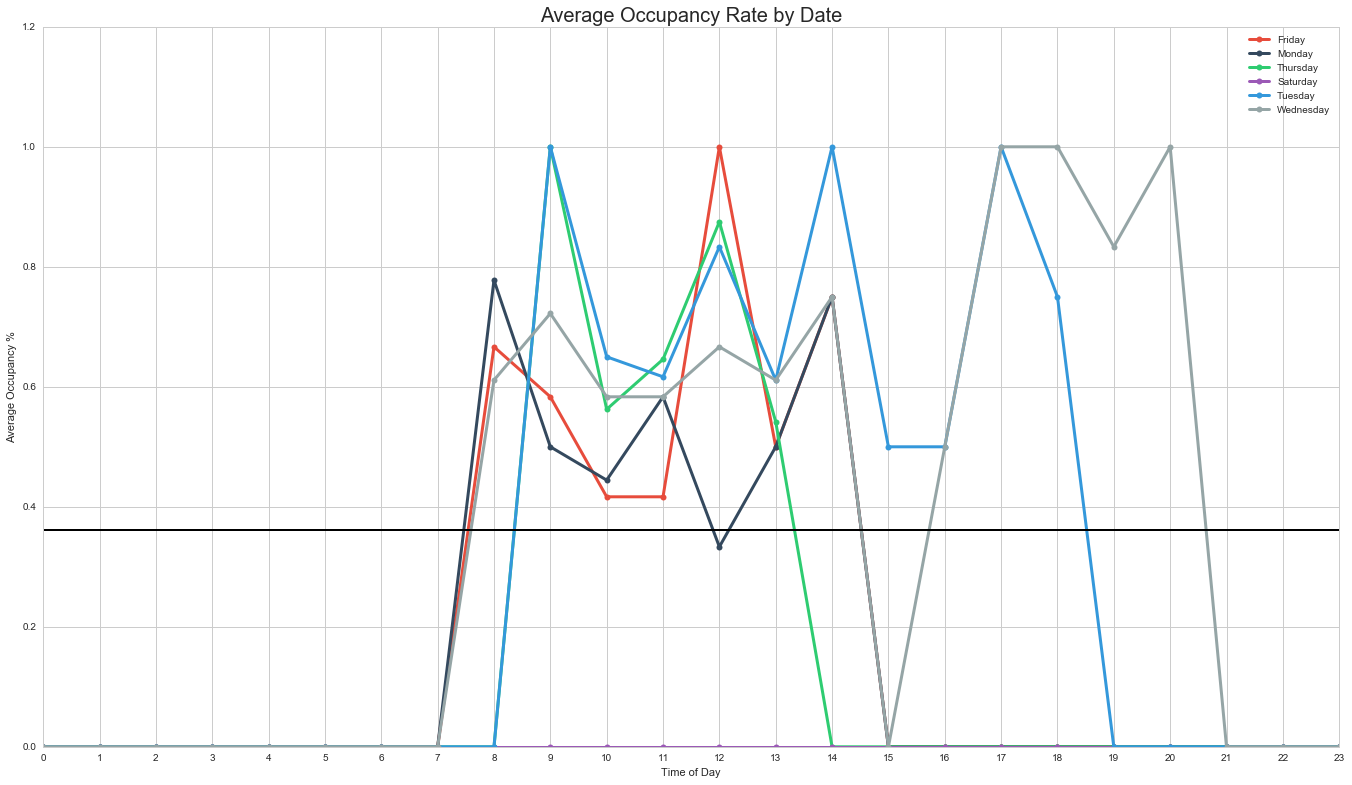

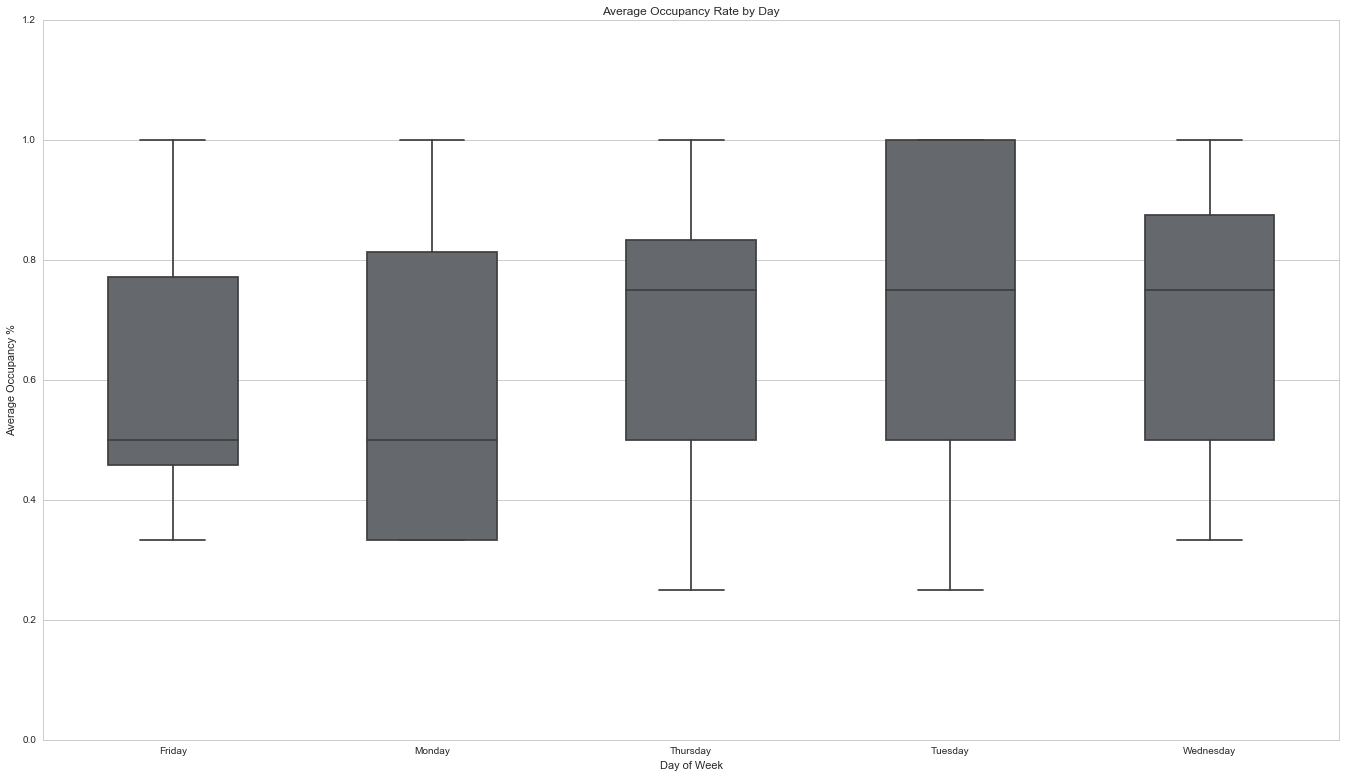

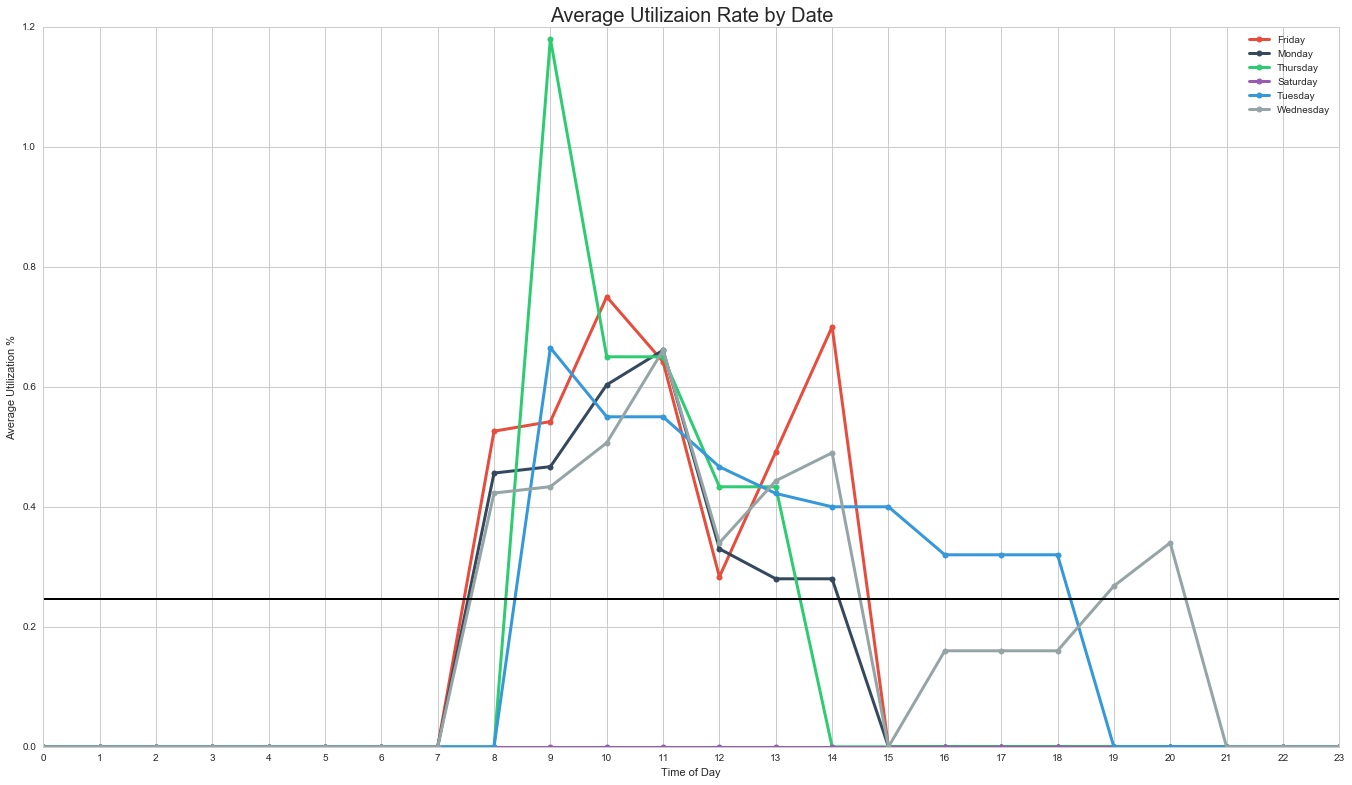

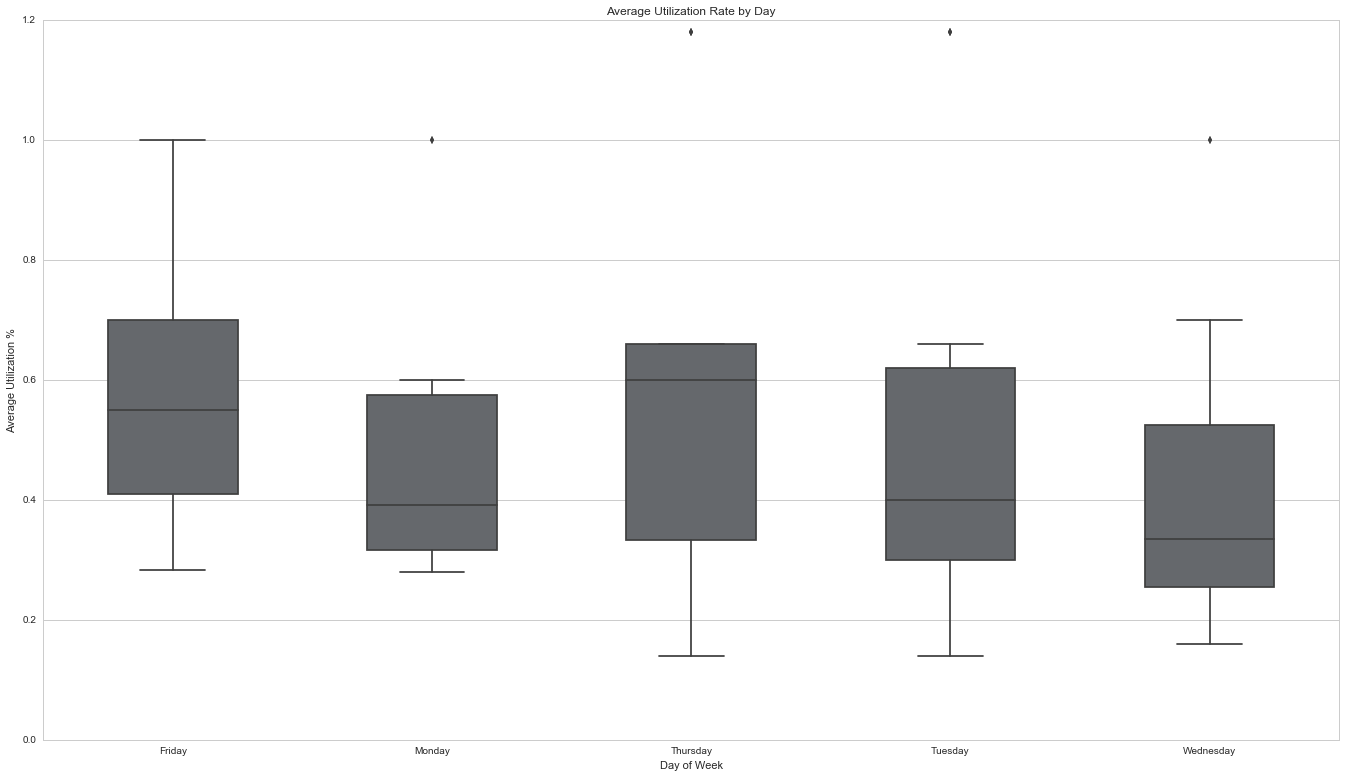

In [16]:
visualization(df2, location = "STAN SHERIFF CENTER")

In [17]:
# def tableauFormat(df2):
#     try:
#         dow = {
#             "F": "Friday",
#             "M": "Monday",
#             "T": "Tuesday",
#             "W": "Wednesday",
#             "R": "Thursday",
#             "S": "Saturday"
#         }

#         df2["Day of Week"] = df2["Day of Week"].apply(lambda x: dow[x])
#     except:
#         pass
    
#     holder = df2[["Building ID", "Room ID", "Day of Week",
#                   "Hour", "Room Net Sqft", "Class Hours Percentage"]].drop_duplicates().reset_index().drop("index", axis = 1).fillna(0)
    
#     # Capacity and Occupancy Rate
#     holder = holder.merge(df2[["Building ID", "Room ID", "Class capacity"]].drop_duplicates(), 
#                  how = 'left', left3_on = ["Building ID", "Room ID"], right_on = ["Building ID", "Room ID"])
    
#     # Enrollment
#     classEnrollment = df2.groupby(["Day of Week", "Hour", "Building ID", "Room ID"])["Class Enrollment"].mean().reset_index().fillna(0)
    
#     holder = holder.merge(classEnrollment, how = "left", left_on = ["Day of Week", "Hour", "Building ID", "Room ID"],
#                 right_on = ["Day of Week", "Hour", "Building ID", "Room ID"])
    
#     # Utilization
#     holder["Utilization Rate"] = holder["Class Enrollment"] / holder["Class capacity"]
    
#     # Add Building Description and realign the columns
#     holder = holder.merge(df2[["Building ID", "Building Description"]].drop_duplicates(), how = "left")
    
#     cols = ['Building ID', 'Building Description','Room ID', 'Day of Week', 'Hour', 
#             'Room Net Sqft', 'Class capacity', 'Class Enrollment', 'Class Hours Percentage', 'Utilization Rate']
    
#     holder = holder[cols]
    
#     return(pd.DataFrame(holder))



### Classroom Utilization

#### File From Aaron

In [24]:
os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")
classData = pd.read_csv("class data subset 8-325-14 to 11-10-14.csv", usecols = [0,1,2,3,4,5,6,7])

classData["dt_start"] = classData["dt_start"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%y %H:%S"))
classData["dt_end"] = classData["dt_end"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%y %H:%S"))

In [32]:
# test = classData[:100].copy()
def utilization(test, start = "dt_start", end = "dt_end"):
    test["zero"] = 0
    test["one"] = 0
    test["two"] = 0
    test["three"] = 0
    test["four"] = 0
    test["five"] = 0
    test["six"] = 0
    test["seven"] = 0
    test["eight"] = 0
    test["nine"] = 0
    test["ten"] = 0
    test["eleven"] = 0 
    test["twelve"] = 0
    test["thirteen"] = 0
    test["fourteen"] = 0
    test["fifteen"] = 0
    test["sixteen"] = 0
    test["seventeen"] = 0
    test["eighteen"] = 0
    test["nineteen"] = 0
    test["twenty"] = 0
    test["twenty one"] = 0
    test["twenty two"] = 0 
    test["twenty three"] = 0

    translate = {
        0: "zero",
        1: "one",
        2: "two",
        3: "three",
        4: "four",
        5: "five",
        6: "six",
        7: "seven",
        8: "eight",
        9: "nine",
        10: "ten",
        11: "eleven",
        12: "twelve",
        13: "thirteen",
        14: "fourteen",
        15: "fifteen",
        16: "sixteen",
        17: "seventeen",
        18: "eighteen",
        19: "nineteen",
        20: "twenty",
        21: "twenty one",
        22: "twenty two",
        23: "twenty three"
    }


    n = 0
    for start, end in zip(test[start], test[end]):
        for hour in np.arange(0,24):
            if start.hour == hour and end.hour == hour:
                holder = (60 - start.minute)
                holder2 = (end.minute)
                test.iloc[n, test.columns.get_loc(translate[hour])] = holder + holder2
            elif start.hour == hour and end.hour == hour + 1:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = end.minute
            elif start.hour == hour and end.hour == hour + 2:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = end.minute
            elif start.hour == hour and end.hour == hour + 3:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = end.minute
            elif start.hour == hour and end.hour == hour + 4:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = end.minute
            elif start.hour == hour and end.hour == hour + 5:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = end.minute
            elif start.hour == hour and end.hour == hour + 6:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = end.minute
            elif start.hour == hour and end.hour == hour + 7:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60                
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 7])] = end.minute
            elif start.hour == hour and end.hour == hour + 8:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = 60                
                test.iloc[n, test.columns.get_loc(translate[hour + 7])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 8])] = end.minute
            elif start.hour == hour and end.hour == hour + 9:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 7])] = 60                
                test.iloc[n, test.columns.get_loc(translate[hour + 8])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 9])] = end.minute
            elif start.hour == hour and end.hour == hour + 10:        
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 7])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 8])] = 60                
                test.iloc[n, test.columns.get_loc(translate[hour + 9])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 10])] = end.minute
            elif start.hour == hour and end.hour == hour + 11:
                test.iloc[n, test.columns.get_loc(translate[hour])] = 60 - start.minute
                test.iloc[n, test.columns.get_loc(translate[hour + 1])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 2])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 3])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 4])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 5])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 6])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 7])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 8])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 9])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 10])] = 60
                test.iloc[n, test.columns.get_loc(translate[hour + 11])] = end.minute                
            else:
                pass
        n+=1

In [25]:
utilization(classData)

In [27]:
os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")
classData.to_csv("Class Times by Hour.csv")

### R25 / Banner Dataset

In [28]:
os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")

# Scheduling Information
r25 = pd.read_excel("201730 R25_Banner 20170113.xlsx", sheetname = "201730-R25")

# Course Information
banner = pd.read_excel("201730 R25_Banner 20170113.xlsx", sheetname = "201730-Banner")

In [29]:
def test(r25, banner):
    
    # Format R25 Data Types
    df = r25.copy()
    df["CRSE"] = df["CRSE"].apply(lambda x: str(x))
    df["BUILDING"] = df["BUILDING"].apply(lambda x: str(x))
    df["BUILDING"] = df["BUILDING"].apply(lambda x: x.replace(" ", ""))
    df["ROOM"] = df["ROOM"].apply(lambda x: str(x))
    df["ROOM"] = df["ROOM"].apply(lambda x: x.replace(" ", ""))

    # Format Banner Data Types
    df2 = banner.copy()
    df2["Crse"] = df2["Crse"].apply(lambda x: str(x))
    df2["Bldg1"] = df2["Bldg1"].apply(lambda x: str(x))
    df2["Room1"] = df2["Room1"].apply(lambda x: str(x))
    
    # Day of Week Translation dictionary1`
    dow = {
        "MO": 0,
        "TU": 1,
        "WE": 2,
        "TH": 3,
        "FR": 4,
        "SA": 5,
        "SU": 6
    }
    
    # Add try and except clause to handle when values have already been changed
    df["DAYS"] = df["DAYS"].apply(lambda x: x.split(" "))

    # Add try and except clause to handle when values have already been changed
    dayList = []
    for list in df["DAYS"]:
        days = []
        for x in list:
            days.append(dow[x])

        dayList.append(days)

    df["DAYS"] = dayList

    
    holder = pd.DataFrame(columns = ["Date", "Course", "Building", "Room", "Capacity"], index = [])
    
    for course, building, room, start, end, days, capacity in zip(df["CRSE"], df["BUILDING"], df["ROOM"], 
                                                       df["START_DT"], df["END_DT"], df["DAYS"], df["MAX_CAPACITY"]):
        
        classDay = []
        
        d1 = start.date()
        d2 = end.date()
        delta = d2 - d1
        
        for x in range(delta.days + 1):
            date = d1 + timedelta(days = x)
            if date.weekday() in days:
                classDay.append(date)
            else:
                pass
         
        classDF = pd.DataFrame(data = classDay, columns = ["Date"])
        
        classDF["Course"] = course
        classDF["Building"] = building
        classDF["Room"] = room
        classDF["Capacity"] = capacity
        classDF["Start Time"] = start.time()
        classDF["End Time"] = end.time()
        
        startDateTime = []
        endDateTime = []
        
        for date, start, end in zip(classDF["Date"], classDF["Start Time"], classDF["End Time"]):
            startDateTime.append(datetime.datetime.combine(date, start))
            endDateTime.append(datetime.datetime.combine(date, end))
            
        classDF["Start Time"] = startDateTime
        classDF["End Time"] = endDateTime
        
        holder = pd.concat([holder, classDF], axis = 0)
    
    holder.reset_index(inplace = True)
    holder.drop("index", axis = 1, inplace = True)
    
    holder = holder.merge(df2[["Crse", "Bldg1", "Room1", "Enrolled", "Class Maximum", "Title"]], how = "left", 
                 left_on = ["Course", "Building", "Room"], right_on = ["Crse", "Bldg1", "Room1"])
    
    holder.drop(["Date", "Crse", "Bldg1", "Room1"], axis = 1, inplace = True)
    
    holder = holder[["Start Time", "End Time", "Course", "Title", "Building", "Room", "Capacity", 
                     "Class Maximum", "Enrolled"]]
    
    holder.sort_values("Start Time", ascending = True, inplace = True)
    
    holder.reset_index(inplace = True)
    
    holder.drop("index", axis = 1, inplace = True)
    
    return(holder)

In [30]:
testDF = test(r25, banner)

In [35]:
testDF.head()

,Start Time,End Time,Course,Title,Building,Room,Capacity,Class Maximum,Enrolled
0,2017-01-09 06:00:00,2017-01-09 07:35:00,100,Intro to Physical Fitness,ARMY,TBA,1000.0,60.0,42.0
1,2017-01-09 06:00:00,2017-01-09 07:05:00,251L,NaN,LC4,TBA,100.0,NaN,NaN
2,2017-01-09 06:30:00,2017-01-09 08:15:00,366,General and Oral Pathology,HEM,200D,30.0,25.0,20.0
3,2017-01-09 07:30:00,2017-01-09 08:25:00,101,Elementary Spanish,MOORE,228,25.0,20.0,20.0
4,2017-01-09 07:30:00,2017-01-09 08:25:00,421,Upper Extremity Assessment,SHRF,101,50.0,18.0,22.0


In [34]:
utilizationTest = testDF[:200].copy()
utilization(utilizationTest, start = "Start Time", end = "End Time")
utilizationTest.head()

,Start Time,End Time,Course,Title,Building,Room,Capacity,Class Maximum,Enrolled,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twenty one,twenty two,twenty three
0,2017-01-09 06:00:00,2017-01-09 07:35:00,100,Intro to Physical Fitness,ARMY,TBA,1000.0,60.0,42.0,0,0,0,0,0,0,60,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-09 06:00:00,2017-01-09 07:05:00,251L,NaN,LC4,TBA,100.0,NaN,NaN,0,0,0,0,0,0,60,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-09 06:30:00,2017-01-09 08:15:00,366,General and Oral Pathology,HEM,200D,30.0,25.0,20.0,0,0,0,0,0,0,30,60,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-09 07:30:00,2017-01-09 08:25:00,101,Elementary Spanish,MOORE,228,25.0,20.0,20.0,0,0,0,0,0,0,0,30,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-09 07:30:00,2017-01-09 08:25:00,421,Upper Extremity Assessment,SHRF,101,50.0,18.0,22.0,0,0,0,0,0,0,0,30,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


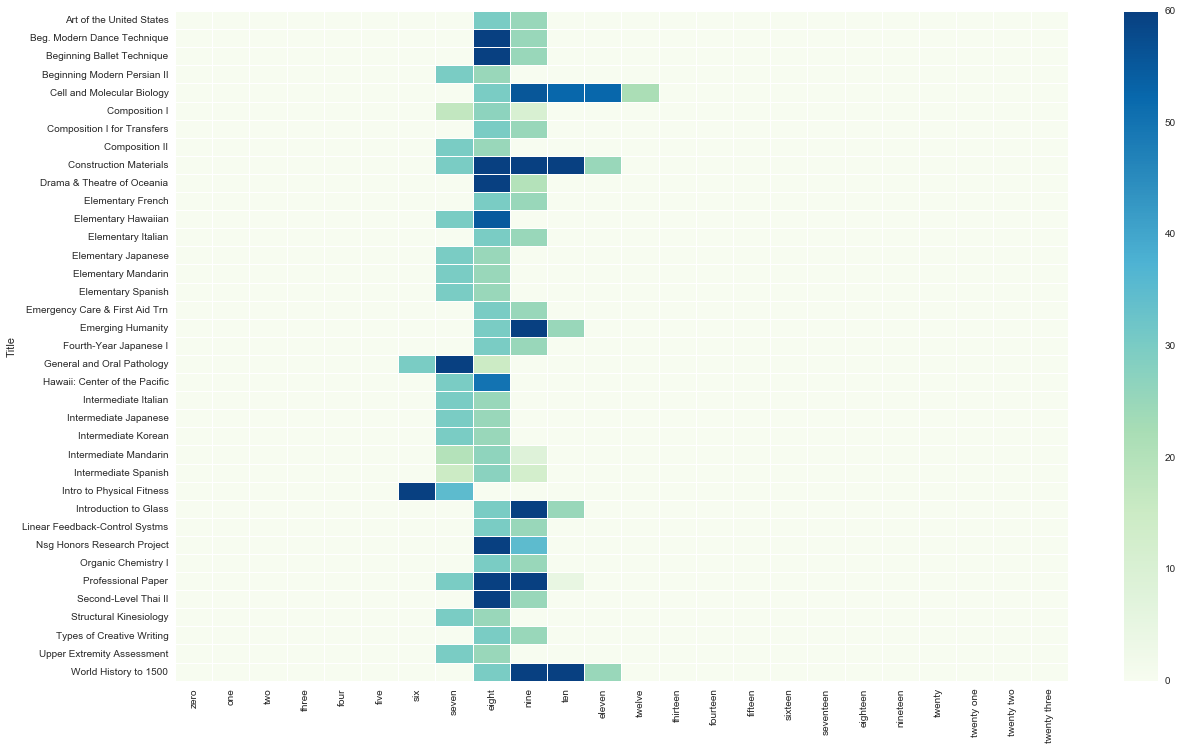

In [48]:
plt.figure(figsize = (20,12))
sns.heatmap(
    utilizationTest.drop(["Start Time", "End Time", "Course", "Building", "Enrolled",
                          "Room", "Capacity", "Class Maximum"], axis = 1).groupby("Title").mean(), 
    cmap = "GnBu", linewidths = 0.01
)

### Testing R25 / Banner Function on new dataset

In [1214]:
# os.chdir("/Volumes/data2/Transfer/Harrison/Data Processing Script/data-processing-scripts")

# # Scheduling Information
# r252 = pd.read_excel("201710 R25_Banner 20170105.xlsx", sheetname = "201710-R25")

# # Course Information
# banner2 = pd.read_excel("201710 R25_Banner 20170105.xlsx", sheetname = "201710-Banner")

In [1215]:
# testDF2 = test(r252, banner2)

### Room Outlook Scheduling

In [43]:
os.chdir("//Volumes/data2/Transfer/Harrison/SCVWD/Outlook Scheduling/Raw Outlook Files/Conf Rm - C225 (Crest)")
c209 = pd.read_excel("Conf Rm - C209 (Crest) RESTRICTED.xls", sheetname = "Calendar")
c209["Room"] = "C209"

c212 = pd.read_excel("Conf Rm - C212 RESTRICTED.xls", sheetname = "Calendar")
c212["Room"] = "C212"

c225 = pd.read_excel("Conf Rm - C225 (Crest).xls", sheetname = "Calendar")
c225["Room"] = "C225"

crest = pd.concat([c209, c212, c225])

crest.reset_index(inplace = True)
crest.drop("index", axis = 1, inplace = True)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [44]:
crest.head()

,Subject,StartDate,StartTime,EndDate,EndTime,Alldayevent,Reminderonoff,ReminderDate,ReminderTime,MeetingOrganizer,RequiredAttendees,OptionalAttendees,MeetingResources,BillingInformation,Categories,Description,Location,Mileage,Priority,Private,Sensitivity,Showtimeas,Room
0,Reserved for Halloween Event,10/31/2016,9:00:00 AM,10/31/2016,4:00:00 PM,False,True,10/31/2016,8:45:00 AM,NaN,NaN,NaN,.Conf Rm - C209 (Crest) RESTRICTED,NaN,NaN,\r\n,.Conf Rm - C209 (Crest) RESTRICTED,NaN,Normal,False,Normal,2,C209
1,Webinar: Structured Hiring Panel,9/27/2016,11:00:00 AM,9/27/2016,12:00:00 PM,False,True,9/27/2016,10:45:00 AM,NaN,Courtney Letts;Debra Williams;Dolores Grissom;...,NaN,.Conf Rm - C209 (Crest) RESTRICTED,NaN,NaN,"Dear Peggy, \r\nThank you for registering for ...",.Conf Rm - C209 (Crest) RESTRICTED,NaN,Normal,False,Normal,3,C209
2,Review New Budget Process - Nancy x2358,9/21/2016,4:00:00 PM,9/21/2016,5:00:00 PM,False,True,9/21/2016,3:45:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,\r\n,NaN,NaN,Normal,False,Normal,2,C209
3,Sherilyn x2772,10/18/2016,10:30:00 AM,10/18/2016,11:30:00 AM,False,True,10/18/2016,10:25:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,\r\n,NaN,NaN,Normal,False,Normal,2,C209
4,Technology needs for Recruitment Team,9/28/2016,9:00:00 AM,9/28/2016,10:00:00 AM,False,True,9/28/2016,8:45:00 AM,NaN,Sudhanshu Tikekar;Courtney Letts;Gauri Khanna;...,NaN,.Conf Rm - C209 (Crest) RESTRICTED,NaN,NaN,\r\n,.Conf Rm - C209 (Crest) RESTRICTED,NaN,Normal,False,Normal,2,C209


In [45]:
def outlook(crest):
    df = crest.copy()
    
    # Drop unnecessary Columns from dataset
    df.drop(['Reminderonoff', 'ReminderDate', 'ReminderTime', 'MeetingResources', 'BillingInformation', 'Categories',
             'Mileage', 'Location', 'Priority', 'Private', 'Sensitivity', 'Showtimeas'], axis = 1, inplace = True)
    
    # Format date and time columns
    df["StartDate"] = df["StartDate"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    df["StartTime"] = df["StartTime"].apply(lambda x: datetime.datetime.strptime(x, '%I:%M:%S %p').time())
    df["EndDate"] = df["EndDate"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    df["EndTime"] = df["EndTime"].apply(lambda x: datetime.datetime.strptime(x, '%I:%M:%S %p').time())
    
    # Function to create start date/time column
    def startCombine(df):
        return(datetime.datetime.combine(df["StartDate"], df["StartTime"]))
    
    # Function to create end date/time column
    def endCombine(df):
        return(datetime.datetime.combine(df["EndDate"], df["EndTime"]))
    
    # Apply date/time functions to dataframe
    df["Start DateTime"] = df.apply(startCombine, axis = 1)
    df["End DateTime"] = df.apply(endCombine, axis = 1)
    
    # Calculate meeting length and format time delta in terms of hours
    df["Meeting Length"] = df["End DateTime"] - df["Start DateTime"]
    df["Meeting Length"] = df["Meeting Length"].apply(lambda x: x.seconds/3600)
    
    # Function to count all required attendees
    def countReq(df):
        try:
            return(len(df["RequiredAttendees"].split(";")))
        except:
            return(0)
    
    # Function to count all optional attendees
    def countOpp(df):
        try:
            return(len(df["OptionalAttendees"].split(";")))
        except:
            return(0)
    
    # Sum all attendees (1 added to include meeting organizer)
    df["Required Count"] = df.apply(countReq, axis = 1)
    df["Optional Count"] = df.apply(countOpp, axis = 1)
    df["Total Attendees"] = df["Required Count"] + df["Optional Count"] + 1
        
    # Run previously created occupancy formula to calculate space utilization 
    occupancy(df, start = "Start DateTime", end = "End DateTime")
    
    # Loop to identify all day events and assign the proper utilization
    for x in range(len(df)):
        if df.iloc[x]["Alldayevent"] == True:
            for col in ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", 
                      "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", 
                      "twenty", "twenty one", "twenty two", "twenty three"]:
                df.iloc[x, df.columns.get_loc(col)] = 60
                df.iloc[x, df.columns.get_loc("Meeting Length")] = 24
        else:
            pass
            
    # Remove Required and optional attendees now that the counts have been calculated
    df.drop(["RequiredAttendees", "OptionalAttendees"], axis = 1, inplace = True)
    
    # Re-order the columns in DataFr
    cols = ["Subject", "Description", "Room", "MeetingOrganizer", "Required Count", "Optional Count", "Total Attendees", 
           "Alldayevent", "Start DateTime", "StartDate", "StartTime", "End DateTime", "EndDate", "EndTime",
            "Meeting Length", "zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", 
            "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", 
            "nineteen", "twenty", "twenty one", "twenty two", "twenty three"]
    
    df = df[cols]
    
    # Order dataframe from first events to last
    df.sort_values(["Start DateTime", "End DateTime"], ascending = [True, True], inplace = True)
    
    # Reset Index
    df.reset_index(inplace = True)
    df.drop("index", axis = 1, inplace = True)
    
    return(df)

In [46]:
crestFull = outlook(crest)

In [47]:
crestFull.head()

,Subject,Description,Room,MeetingOrganizer,Required Count,Optional Count,Total Attendees,Alldayevent,Start DateTime,StartDate,StartTime,End DateTime,EndDate,EndTime,Meeting Length,zero,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen,fourteen,fifteen,sixteen,seventeen,eighteen,nineteen,twenty,twenty one,twenty two,twenty three
0,Sup Surveyor -- Recruitment Planning Meeting,"Jason,\r\n\r\nAt this meeting we will plan the...",C212,NaN,2,0,3,False,2015-08-03 10:00:00,2015-08-03,10:00:00,2015-08-03 11:30:00,2015-08-03,11:30:00,1.5,0,0,0,0,0,0,0,0,0,0,60,30,0,0,0,0,0,0,0,0,0,0,0,0
1,DCCS,NaN,C225,DCCS,5,1,7,False,2015-08-03 13:00:00,2015-08-03,13:00:00,2015-08-03 14:00:00,2015-08-03,14:00:00,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0
2,Dolores ext 3024,\r\n,C209,NaN,0,0,1,False,2015-08-03 13:00:00,2015-08-03,13:00:00,2015-08-03 15:00:00,2015-08-03,15:00:00,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,60,0,0,0,0,0,0,0,0,0
3,Water Measurement Tech II,Hi –\r\nI’ve adjusted the schedule because we ...,C212,NaN,3,2,6,False,2015-08-03 13:30:00,2015-08-03,13:30:00,2015-08-03 17:00:00,2015-08-03,17:00:00,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,30,60,60,60,0,0,0,0,0,0,0
4,ATMS,Discuss transferring of a District-wide traini...,C209,NaN,3,0,4,False,2015-08-03 15:00:00,2015-08-03,15:00:00,2015-08-03 15:30:00,2015-08-03,15:30:00,0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0


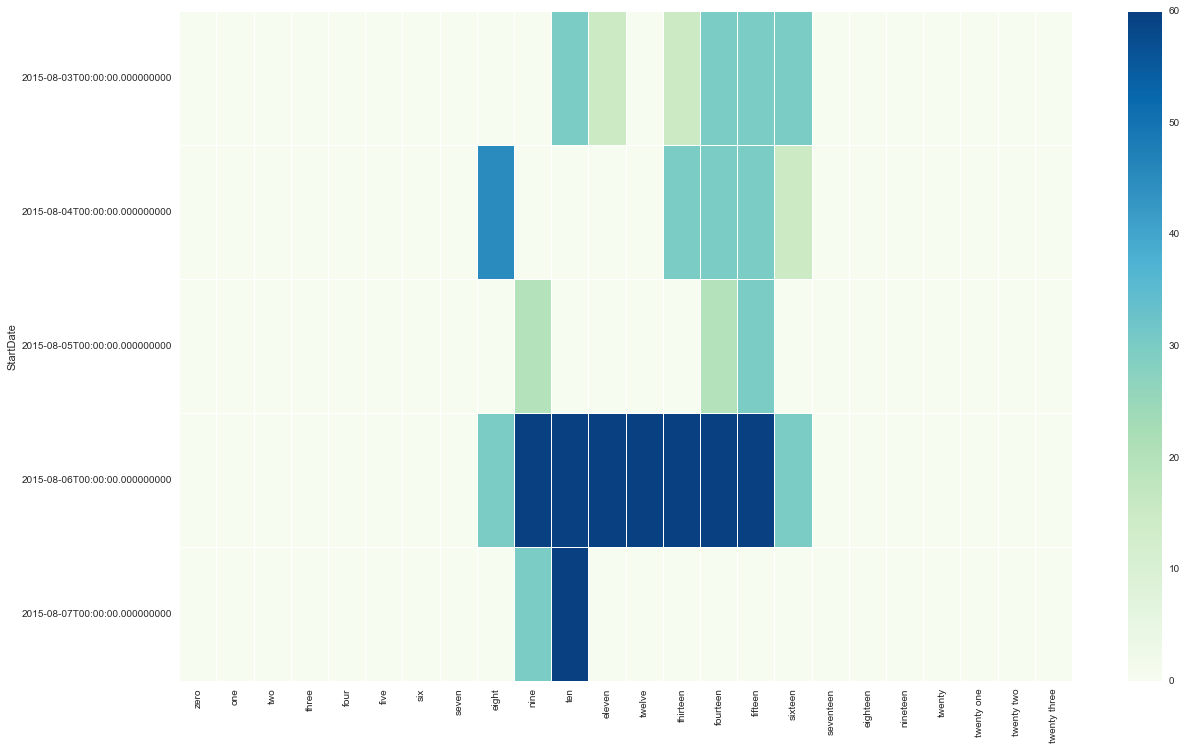

In [51]:
plt.figure(figsize = (20, 12))

sns.heatmap(crestFull[crestFull["Room"] == "C212"].groupby("StartDate")[["zero", "one", "two", "three", "four", "five", "six", 
                                                              "seven", "eight", "nine", "ten", "eleven", "twelve", 
                                                              "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", 
                                                              "eighteen", "nineteen", "twenty", "twenty one", 
                                                              "twenty two", "twenty three"]].mean().head(),
             cmap = "GnBu", linewidths = 0.01
            )

#### Testing Outlook Function

In [52]:
os.chdir("//Volumes/data2/Transfer/Harrison/SCVWD/Outlook Scheduling/Raw Outlook Files/Training Room - Maple (BHA)")
bha = pd.read_excel("Training Room - Computers (BHA).xls", sheetname = "Calendar")
bha["Room"] = "Computer"

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [53]:
bhaFull = outlook(bha)